## 2차 과제

- 주제: 데이터 크롤링을 활용한 뉴스 & 리뷰 데이터 분석
- 데이터: 자유롭게 크롤링
- 사용 라이브러리: selenium, beautifulsoup, etc.

### 1. 뉴스 기사 데이터 크롤링

1.1 원하는 뉴스 기사의 본문을 크롤링하시오.

In [2]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.yna.co.kr/view/AKR20240317028000007?input=1195m') # 위 링크를 가져와서 response에 삽입
html = response.text # html에 response 텍스트를 넣음
soup = BeautifulSoup(html, "html.parser")
total = soup.select_one('#articleWrap > div.content01.scroll-article-zone01 > div > div > article') # 기사 본문에 해당하는 부분을 selector해서 가져옴(사진에 대한 설명, 기자 등 다 포함됨)
ps = total.find_all('p') # p들의 집합을 만듦

arranged= [] # p만 넣을 리스트 생성
for p in ps :
    try :
        p["class"] # p class가 아니면 오류가 나서 except로 넘어감
    except:
        arranged.append(p) # 넘어온 것들은 arranged에 저장

arranged = arranged[:-1] # 마지막 기자 이메일 주소 삭제

body = "" # 본문만 넣을 body 
for arrange in arranged : # arranged는 리스트라서 text 사용이 불가능하여, arrange로 text 사용을 하여 불러온다 -> arrange는 type이 bs4임
    body += arrange.text

print(body)
print(type(body))

 (서울=연합뉴스) 하남직 김경윤 기자 = '현역 최고 야구 스타' 오타니 쇼헤이(29·로스앤젤레스 다저스)가 안타를 생산하지 못하고, 고척돔 첫 경기를 마쳤다.  오타니는 17일 서울시 구로구 고척 스카이돔에서 열린 2024 미국프로야구 메이저리그(MLB) 서울 시리즈 키움 히어로즈와의 평가전에 2번 지명타자로 선발 출전해 2타수 무안타에 그쳤다.  기대했던 시원한 타구는 나오지 않았지만, 오타니의 일거수일투족에 고척돔을 찾은 한국 야구팬들은 환호했다.  오타니는 1회초 1사 주자 없는 상황에서 이날 첫 타석에 들어섰다.  마운드에는 키움 외국인 투수 아리엘 후라도가 서 있었다. 후라도는 미국에서 뛸 때 오타니를 여러 차례 상대했고, 22타수 4안타(타율 0.182) 2타점의 우위를 보였다.  고척돔 맞대결에서도 후라도가 오타니를 눌렀다.  오타니는 1회 볼 카운트 2볼-2스트라이크에서 후라도의 5구째 시속 148㎞ 싱커에 배트를 헛돌려 삼진을 당했다.  오타니가 등장할 때 큰 함성으로 맞이했던 팬들은 오타니가 삼진으로 물러나자, 아쉬움 섞인 탄성을 내뱉었다.  2회 1사 1, 3루에서도 오타니는 삼진으로 돌아섰다.  오타니는 볼 카운트 1볼-2스트라이크에서 시속 147㎞ 직구에 또 배트를 헛돌렸다.  헬멧이 벗겨질 정도로 강하게 배트를 휘두르고 삼진을 당한 오타니는 허탈한 표정으로 1루 쪽 더그아웃으로 들어왔다.  하지만, 팬들은 삼진을 당한 오타니를 향해서도 손뼉을 쳤다. 데이브 로버츠 다저스 감독은 경기 전 "오타니는 두 타석을 소화할 것"이라고 예고했다. 감독의 말처럼 오타니는 단 두 차례만 타석에 섰다.  오타니가 한국을 찾은 건, 일본 하나마키 히가시 고등학교 재학 중이던 2012년에 출전한 세계청소년야구선수권대회(서울 목동구장) 이후 12년 만이다. 12년 사이 '일본 야구 유망주' 오타니는 '세계 최고 선수'로 우뚝 섰다.  올 시즌을 앞두고는 다저스와 10년 총액 7억 달러(약 9천324억원)의 세계 스포츠 사상 최대 규모의 계약을 했다.  

1.2 크롤링한 본문을 단어 단위로 나누고 각 단어가 나온 횟수와 함께 dataframe 형식으로 변환하시오.

In [3]:
word = body.split(' ')
rows = set(word)
listed_row = list(rows)
listed_row = listed_row[1:] # '' 부분 삭제
print(listed_row)

listed_col = list()
for row in listed_row :
    listed_col.append(word.count(row))

['맞이했던', '아쉬움', '결혼을', '휘두르고', '0.182)', '서울', '카운트', '히가시', '볼', '2번', '당했다.', '상대했고,', '예열', '점검을', '후라도의', '마운드에는', '키움', '2타점의', '맞대결에서도', '직구에', '쪽', '우뚝', '규모의', '파드리스와의', '이적', '후라도는', '헛돌려', '배트를', '또', '20일과', '아내와', '우위를', '1루', '다저스', '뛸', '소화할', '야구팬들은', '18일에는', '더그아웃으로', '미국에서', '깜짝', '고척', '세계청소년야구선수권대회(서울', '22타수', '개막전을', '3루에서도', '고척돔에서', '있었다.', '오타니', '열린', '헛돌렸다.', '출신인', '서울로', '9천324억원)의', '나오지', '외국인', '벌이기로', '주자', '하남직', '마미코와의', '히어로즈와의', '벗겨질', '만이다.', '중이던', '10년', '눌렀다.', '148㎞', '1,', '한다.', '했다.', '12년', '정규시즌', '야구대표팀과', "'현역", '오타니의', '시리즈', '1회초', '손뼉을', '하나마키', '앞두고', '오타니가', '팬들은', '5구째', '오타니를', '탄성을', '이후', '당한', '오기', '오타니는', '이날', '커졌다.', '2012년에', '물러나자,', '김경윤', '헬멧이', '고등학교', '계약을', '하면서,', '경기를', "'일본", '다나카', '돌아섰다.', '기대했던', '시원한', '찾은', '서', '4안타(타율', '1사', '2볼-2스트라이크에서', '함성으로', '7억', '못하고,', '삼진을', '강하게', '단', '다저스와', '최종', '미국프로야구', '평가전에서', '2타수', '그쳤다.', '입국하면서', '무안타에', '타구는', '구로구', '고척돔', '들어섰다.', '앞두고는', '1회', '(서울=연합뉴스)', '서울에서'

In [4]:
import pandas as pd

df = pd.DataFrame({'word' : listed_row,
                   'count' : listed_col})

df

,word,count
0,맞이했던,1
1,아쉬움,1
2,결혼을,1
3,휘두르고,1
4,0.182),1
...,...,...
227,허탈한,1
228,선수,1
229,재학,1
230,차례,1


1.3 불용어를 제거하시오.

In [5]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = "( ) = \' 서울=연합뉴스 , . · 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓"

word_tokens = word_tokenize(body)
stop_words=stop_words.split(' ')

result = [] 
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 

result

['하남직',
 '김경윤',
 '기자',
 "'현역",
 '최고',
 '야구',
 '스타',
 '오타니',
 '쇼헤이',
 '29·로스앤젤레스',
 '다저스',
 '안타를',
 '생산하지',
 '못하고',
 '고척돔',
 '첫',
 '경기를',
 '마쳤다',
 '오타니는',
 '17일',
 '서울시',
 '구로구',
 '고척',
 '스카이돔에서',
 '열린',
 '2024',
 '미국프로야구',
 '메이저리그',
 'MLB',
 '서울',
 '시리즈',
 '키움',
 '히어로즈와의',
 '평가전에',
 '2번',
 '지명타자로',
 '선발',
 '출전해',
 '2타수',
 '무안타에',
 '그쳤다',
 '기대했던',
 '시원한',
 '타구는',
 '나오지',
 '않았지만',
 '오타니의',
 '일거수일투족에',
 '고척돔을',
 '찾은',
 '한국',
 '야구팬들은',
 '환호했다',
 '오타니는',
 '1회초',
 '1사',
 '주자',
 '없는',
 '상황에서',
 '이날',
 '첫',
 '타석에',
 '들어섰다',
 '마운드에는',
 '키움',
 '외국인',
 '투수',
 '아리엘',
 '후라도가',
 '서',
 '있었다',
 '후라도는',
 '미국에서',
 '뛸',
 '오타니를',
 '여러',
 '차례',
 '상대했고',
 '22타수',
 '4안타',
 '타율',
 '0.182',
 '2타점의',
 '우위를',
 '보였다',
 '고척돔',
 '맞대결에서도',
 '후라도가',
 '오타니를',
 '눌렀다',
 '오타니는',
 '1회',
 '볼',
 '카운트',
 '2볼-2스트라이크에서',
 '후라도의',
 '5구째',
 '시속',
 '148㎞',
 '싱커에',
 '배트를',
 '헛돌려',
 '삼진을',
 '당했다',
 '오타니가',
 '등장할',
 '큰',
 '함성으로',
 '맞이했던',
 '팬들은',
 '오타니가',
 '삼진으로',
 '물러나자',
 '아쉬움',
 '섞인',
 '탄성을',
 '내뱉었다',
 '2회',
 '1사',
 '1',
 '3루에서도'

1.4 처리한 데이터를 워드아트로 변환해 어떤 단어가 가장 많이 나왔는지 확인하시오(폰트, 색 등 자유).

In [7]:
from wordcloud import WordCloud

dic_word = df.set_index('word').to_dict()['count']

wordcloud = WordCloud(font_path="AppleGothic").generate_from_frequencies(dic_word)
wordcloud.words_


{'오타니는': 1.0,
 '오타니가': 0.4,
 '오타니를': 0.4,
 '배트를': 0.3,
 '삼진을': 0.3,
 '첫': 0.3,
 '카운트': 0.2,
 '볼': 0.2,
 '키움': 0.2,
 '다저스': 0.2,
 '12년': 0.2,
 '정규시즌': 0.2,
 '팬들은': 0.2,
 '당한': 0.2,
 '경기를': 0.2,
 '찾은': 0.2,
 '1사': 0.2,
 '고척돔': 0.2,
 '후라도가': 0.2,
 '때': 0.2,
 '한국': 0.2,
 '전': 0.2,
 '최고': 0.2,
 '타석에': 0.2,
 '야구': 0.2,
 '삼진으로': 0.2,
 '두': 0.2,
 '섰다.': 0.2,
 '시속': 0.2,
 '맞이했던': 0.1,
 '아쉬움': 0.1,
 '결혼을': 0.1,
 '휘두르고': 0.1,
 '0.182)': 0.1,
 '서울': 0.1,
 '히가시': 0.1,
 '2번': 0.1,
 '당했다.': 0.1,
 '상대했고,': 0.1,
 '예열': 0.1,
 '점검을': 0.1,
 '후라도의': 0.1,
 '마운드에는': 0.1,
 '2타점의': 0.1,
 '맞대결에서도': 0.1,
 '직구에': 0.1,
 '쪽': 0.1,
 '우뚝': 0.1,
 '규모의': 0.1,
 '파드리스와의': 0.1,
 '이적': 0.1,
 '후라도는': 0.1,
 '헛돌려': 0.1,
 '또': 0.1,
 '20일과': 0.1,
 '아내와': 0.1,
 '우위를': 0.1,
 '1루': 0.1,
 '뛸': 0.1,
 '소화할': 0.1,
 '야구팬들은': 0.1,
 '18일에는': 0.1,
 '더그아웃으로': 0.1,
 '미국에서': 0.1,
 '깜짝': 0.1,
 '고척': 0.1,
 '세계청소년야구선수권대회(서울': 0.1,
 '22타수': 0.1,
 '개막전을': 0.1,
 '3루에서도': 0.1,
 '고척돔에서': 0.1,
 '있었다.': 0.1,
 '오타니': 0.1,
 '열린': 0.1,
 '헛돌렸다.': 0.1,
 '출

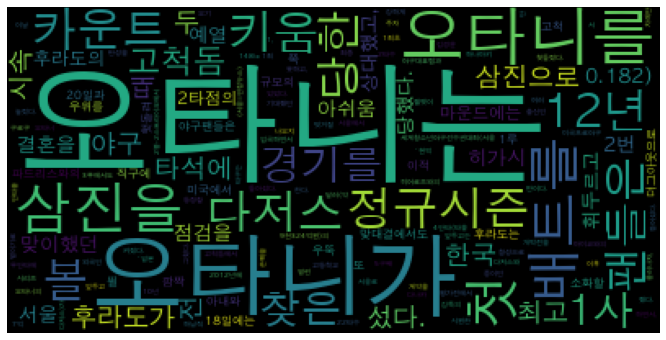

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.imshow(wordcloud)
plt.axis('off')

plt.show()

### 2. 플레이스토어 리뷰 데이터 크롤링(동적 크롤링)

2.1 100개 이상의 리뷰를 가진 앱에 있는 댓글 리뷰를 크롤링하시오.

2.2 크롤링한 데이터를 dataframe 형태로 변환하시오(날짜, 별점, 리뷰 유저 등).

2.3 긍정 리뷰와 부정 리뷰를 나누시오(기준은 자유).

### 3. 자유 분석

3.1 위에서 크롤링한 데이터들을 활용해 자유롭게 인사이트를 도출하시오.